In [1]:
import pandas as pd
import numpy as np
import unidecode
import requests
import json
import time

headers = {'Host': 'stats.nba.com', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0', 'Accept': 'application/json, text/plain, */*', 'Accept-Language': 'en-US,en;q=0.5', 'Accept-Encoding': 'gzip, deflate, br', 'x-nba-stats-origin': 'stats', 'x-nba-stats-token': 'true', 'Connection': 'keep-alive', 'Referer': 'https://stats.nba.com/', 'Pragma': 'no-cache', 'Cache-Control': 'no-cache'}

df_list = []

#for ssn in ['2013-14','2014-15','2015-16','2016-17','2017-18','2018-19','2019-20','2020-21','2021-22','2022-23']:
for ssn in ['2022-23']:

    # retrieve the 22 data sets that will be merged to include all of our final 189 features

    #############################
    # basic stats

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df = pd.DataFrame.from_records(data, columns=columns) 
    df.head()

    #############################
    # height / weight

    url = 'https://stats.nba.com/stats/leaguedashplayerbiostats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    db = pd.DataFrame.from_records(data, columns=columns) 
    db.head()

    #############################
    # deflections

    url = 'https://stats.nba.com/stats/leaguehustlestatsplayer?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df2 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # passing

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Passing&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df3 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # speed / distance

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=SpeedDistance&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df4 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # touches

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Possessions&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)
    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df5 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # scoring

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Efficiency&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df6 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # defense

    url = 'https://stats.nba.com/stats/leaguedashptdefend?College=&Conference=&Country=&DateFrom=&DateTo=&DefenseCategory=Overall&Division=&DraftPick=&DraftYear=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df7 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # advanced

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df8 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # misc scoring

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Misc&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df9 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # dws

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Defense&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df10 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # rebounding

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Rebounding&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df11 = pd.DataFrame.from_records(data, columns=columns) # rebounding

    #############################
    # shooting zones

    url = 'https://stats.nba.com/stats/leaguedashplayershotlocations?College=&Conference=&Country=&DateFrom=&DateTo=&DistanceRange=By%20Zone&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2023-24&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets']['rowSet']
    columns = json['resultSets']['headers'][1]['columnNames']

    df12 = pd.DataFrame.from_records(data, columns=columns) 
    #print(df12.columns)

    df12.columns = [
    'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'NICKNAME',
    'RA_FGM', 'RA_FGA', 'RA_FG_PCT', 
    'PAINT_FGM', 'PAINT_FGA', 'PAINT_FG_PCT', 
    'MIDRANGE_FGM', 'MIDRANGE_FGA', 'MIDRANGE_FG_PCT', 
    'LC3_FGM', 'LC3_FGA', 'LC3_FG_PCT', 
    'RC3_FGM', 'RC3_FGA', 'RC3_FG_PCT', 
    'C3_FGM', 'C3_FGA', 'C3_FG_PCT', 
    'AB3_FGM', 'AB3_FGA', 'AB3_FG_PCT', 
    'OTHER_FGM', 'OTHER_FGA', 'OTHER_FG_PCT'
]

    #############################
    # assisted / unassisted scoring

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Scoring&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df13 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # usage stats

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Usage&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df14 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # isolation plays

    url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=Totals&PlayType=Isolation&PlayerOrTeam=P&SeasonType=Regular+Season&SeasonYear=' + str(ssn) + '&TypeGrouping=offensive'

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df15 = pd.DataFrame.from_records(data, columns=columns) # iso

    df15.rename(columns={'POSS_PCT':'ISO_POSS_PCT','EFG_PCT':'ISO_EFG_PCT','PTS':'ISO_PTS'}, inplace=True)

    g = df15.groupby(['PLAYER_NAME'])

    df15 = pd.merge(g.apply(lambda x: pd.Series(np.average(x[['ISO_POSS_PCT','ISO_EFG_PCT']],weights=x['POSS'],axis=0),['ISO_POSS_PCT','ISO_EFG_PCT'])).reset_index(drop=False),pd.DataFrame(g.sum()['ISO_PTS']).reset_index(drop=False),on='PLAYER_NAME')

    #############################
    # pnr ball handler

    url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=Totals&PlayType=PRBallHandler&PlayerOrTeam=P&SeasonType=Regular+Season&SeasonYear=' + str(ssn) + '&TypeGrouping=offensive'

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df16 = pd.DataFrame.from_records(data, columns=columns) 

    df16.rename(columns={'POSS_PCT':'PRBH_POSS_PCT','EFG_PCT':'PRBH_EFG_PCT','PTS':'PRBH_PTS'}, inplace=True)

    g = df16.groupby(['PLAYER_NAME'])

    df16 = pd.merge(g.apply(lambda x: pd.Series(np.average(x[['PRBH_POSS_PCT','PRBH_EFG_PCT']],weights=x['POSS'],axis=0),['PRBH_POSS_PCT','PRBH_EFG_PCT'])).reset_index(drop=False),pd.DataFrame(g.sum()['PRBH_PTS']).reset_index(drop=False),on='PLAYER_NAME')

    #############################
    # pnr roll man

    url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=Totals&PlayType=PRRollMan&PlayerOrTeam=P&SeasonType=Regular+Season&SeasonYear=' + str(ssn) + '&TypeGrouping=offensive'

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df17 = pd.DataFrame.from_records(data, columns=columns) 

    df17.rename(columns={'POSS_PCT':'PRRM_POSS_PCT','EFG_PCT':'PRRM_EFG_PCT','PTS':'PRRM_PTS'}, inplace=True)

    g = df17.groupby(['PLAYER_NAME'])

    df17 = pd.merge(g.apply(lambda x: pd.Series(np.average(x[['PRRM_POSS_PCT','PRRM_EFG_PCT']],weights=x['POSS'],axis=0),['PRRM_POSS_PCT','PRRM_EFG_PCT'])).reset_index(drop=False),pd.DataFrame(g.sum()['PRRM_PTS']).reset_index(drop=False),on='PLAYER_NAME')

    #############################
    # spot up

    url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=Totals&PlayType=Spotup&PlayerOrTeam=P&SeasonType=Regular+Season&SeasonYear=' + str(ssn) + '&TypeGrouping=offensive'

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df18 = pd.DataFrame.from_records(data, columns=columns) 

    df18.rename(columns={'POSS_PCT':'SU_POSS_PCT','EFG_PCT':'SU_EFG_PCT','PTS':'SU_PTS'}, inplace=True)

    g = df18.groupby(['PLAYER_NAME'])

    df18 = pd.merge(g.apply(lambda x: pd.Series(np.average(x[['SU_POSS_PCT','SU_EFG_PCT']],weights=x['POSS'],axis=0),['SU_POSS_PCT','SU_EFG_PCT'])).reset_index(drop=False),pd.DataFrame(g.sum()['SU_PTS']).reset_index(drop=False),on='PLAYER_NAME')

    #############################
    # drives

    url = 'https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=Totals&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Drives&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    df19 = pd.DataFrame.from_records(data, columns=columns) 

    #############################
    # advanced value stats

    df20 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_' + str(ssn[0:2] + ssn[-2:]) + '_advanced.html', header=0)[0][['Player','PER','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP']]

    df20.columns = ['PLAYER_NAME','PER','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP']

    df20 = df20[df20.PLAYER_NAME !='Player'].reset_index(drop=True)

    df20 = df20.drop_duplicates(subset=['PLAYER_NAME'],keep='first').reset_index(drop=True)
    df20.head()

    # basketball-reference names sometime differ from stats.nba.com names, so these discrepancies must be fixed

    def remove_accents(a):
        return unidecode.unidecode(a).strip('*')
    df20['PLAYER_NAME'] = df20['PLAYER_NAME'].apply(remove_accents)

    df20['PLAYER_NAME'].replace({'Robert Williams':'Robert Williams III','Marcus Morris':'Marcus Morris Sr.','Derrick Walton':'Derrick Walton Jr.','Juan Hernangomez':'Juancho Hernangomez','Sviatoslav Mykhailiuk':'Svi Mykhailiuk','Zach Norvell':'Zach Norvell Jr.','Lonnie Walker':'Lonnie Walker IV','Charlie Brown':'Charles Brown Jr.','C.J. Miles':'CJ Miles','Wesley Iwundu':'Wes Iwundu','J.J. Redick':'JJ Redick','B.J. Johnson':'BJ Johnson','Melvin Frazier':'Melvin Frazier Jr.','Otto Porter':'Otto Porter Jr.','James Ennis':'James Ennis III','Danuel House':'Danuel House Jr.','Brian Bowen':'Brian Bowen II','Kevin Knox':'Kevin Knox II','Frank Mason III':'Frank Mason','Harry Giles':'Harry Giles III','T.J. Leaf':'TJ Leaf','J.R. Smith':'JR Smith','Vince Edwards':'Vincent Edwards','D.J. Stephens':'DJ Stephens','Mitch Creek':'Mitchell Creek','R.J. Hunter':'RJ Hunter','Wade Baldwin':'Wade Baldwin IV','J.J. Hickson':'JJ Hickson','D.J. White':'DJ White','Glen Rice Jr.':'Glen Rice','A.J. Price':'AJ Price','Jeff Taylor':'Jeffery Taylor','Perry Jones':'Perry Jones III','Vitor Luiz Faverani':'Vitor Faverani','Hamady N\'Diaye':'Hamady Ndiaye','Roger Mason':'Roger Mason Jr.','K.J. McDaniels':'KJ McDaniels','P.J. Hairston':'PJ Hairston','Johnny O\'Bryant':'Johnny O\'Bryant III','J.J. O\'Brien':'JJ O\'Brien','A.J. Hammons':'AJ Hammons','Vince Hunter':'Vincent Hunter','Andrew White':'Andrew White III','Matt Williams':'Matt Williams Jr.'},inplace=True)

    #############################
    # positions

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=C&PlusMinus=N&Rank=N&Season=' +str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    c_df = pd.DataFrame.from_records(data, columns=columns) # CENTERS

    ###

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=G&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    g_df = pd.DataFrame.from_records(data, columns=columns) # GUARDS

    ###

    url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=F&PlusMinus=N&Rank=N&Season=' + str(ssn) + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

    json = requests.get(url, headers=headers).json()
    time.sleep(1)

    data = json['resultSets'][0]['rowSet']
    columns = json['resultSets'][0]['headers']

    f_df = pd.DataFrame.from_records(data, columns=columns) # FORWARDS

    c_df['position'] = 'C'
    g_df['position'] = 'G'
    f_df['position'] = 'F'

    pf = pd.concat([c_df,g_df,f_df]).reset_index(drop=True)
    pf = pf[['PLAYER_NAME','PLAYER_ID','AGE','MIN','position']]
    pf.columns = ['player','player_id','age','mp','position']

    row_list = []

    for n in pf.player.unique():

        tf = pf[pf.player == n].reset_index(drop=True)
        posf = pd.DataFrame(tf.groupby('position')['mp'].sum()).sort_values(by='mp',ascending=False).reset_index(drop=False)

        pos1 = posf.position[0]

        if posf.shape[0] > 1:
            pos2 = posf.position[1]
        else:
            pos2 = None
        if posf.shape[0] > 2:
            pos3 = posf.position[2]
        else:
            pos3 = None

        dict1 = {'player':n,'pos1':pos1,'pos2':pos2,'pos3':pos3}

        row_list.append(dict1)

    pfin = pd.DataFrame(row_list)[['player','pos1','pos2','pos3']]
    pfin.columns = ['PLAYER_NAME','POSITION','pos2','pos3']

    #############################
    # now, all 22 dataframes can be merged into one: df

    df = df[['PLAYER_NAME','AGE','GP','MIN','FGM','FGA','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS']]

    df = pd.merge(df,pfin[['PLAYER_NAME','POSITION']],on='PLAYER_NAME')

    df = pd.merge(df,pd.get_dummies(df.POSITION), left_index=True, right_index=True) # one-hot encoding on position to create three columns: C, G, F

    df = pd.merge(df, db[['PLAYER_NAME', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT', 'AST_PCT']], on='PLAYER_NAME', how='left')

    df = pd.merge(df,df2[['PLAYER_NAME','CONTESTED_SHOTS','CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT','DEFLECTIONS','CHARGES_DRAWN','SCREEN_ASSISTS','SCREEN_AST_PTS','OFF_LOOSE_BALLS_RECOVERED','DEF_LOOSE_BALLS_RECOVERED','LOOSE_BALLS_RECOVERED','OFF_BOXOUTS','DEF_BOXOUTS','BOX_OUT_PLAYER_TEAM_REBS','BOX_OUT_PLAYER_REBS','BOX_OUTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df3[['PLAYER_NAME','PASSES_MADE','PASSES_RECEIVED','FT_AST','SECONDARY_AST','POTENTIAL_AST','AST_PTS_CREATED']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df4[['PLAYER_NAME','DIST_MILES','DIST_MILES_OFF','DIST_MILES_DEF','AVG_SPEED','AVG_SPEED_OFF','AVG_SPEED_DEF']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df5[['PLAYER_NAME','TOUCHES','FRONT_CT_TOUCHES','TIME_OF_POSS','AVG_SEC_PER_TOUCH','AVG_DRIB_PER_TOUCH','PTS_PER_TOUCH','ELBOW_TOUCHES','POST_TOUCHES']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df6[['PLAYER_NAME','DRIVE_PTS','DRIVE_FG_PCT','CATCH_SHOOT_PTS','CATCH_SHOOT_FG_PCT','PULL_UP_PTS','PULL_UP_FG_PCT','PAINT_TOUCH_PTS','PAINT_TOUCH_FG_PCT','POST_TOUCH_PTS','POST_TOUCH_FG_PCT','ELBOW_TOUCH_PTS','ELBOW_TOUCH_FG_PCT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df7[['PLAYER_NAME','D_FGM','D_FGA','D_FG_PCT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df8[['PLAYER_NAME','OFF_RATING','DEF_RATING','AST_RATIO','PACE','PIE']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df9[['PLAYER_NAME','PTS_OFF_TOV','PTS_2ND_CHANCE','PTS_FB','PTS_PAINT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df10[['PLAYER_NAME','DEF_WS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df11[['PLAYER_NAME','AVG_REB_DIST','REB_CHANCE_PCT','REB_CHANCE_PCT_ADJ','REB_CHANCES','REB_CONTEST_PCT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df12[['PLAYER_NAME','RA_FGM', 'RA_FGA', 'RA_FG_PCT', 
    'PAINT_FGM', 'PAINT_FGA', 'PAINT_FG_PCT', 
    'MIDRANGE_FGM', 'MIDRANGE_FGA', 'MIDRANGE_FG_PCT', 
    'LC3_FGM', 'LC3_FGA', 'LC3_FG_PCT', 
    'RC3_FGM', 'RC3_FGA', 'RC3_FG_PCT', 
    'C3_FGM', 'C3_FGA', 'C3_FG_PCT', 
    'AB3_FGM', 'AB3_FGA', 'AB3_FG_PCT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df13[['PLAYER_NAME','PCT_FGA_2PT','PCT_FGA_3PT','PCT_PTS_2PT','PCT_PTS_2PT_MR','PCT_PTS_3PT','PCT_PTS_FB','PCT_PTS_FT','PCT_PTS_OFF_TOV','PCT_PTS_PAINT','PCT_AST_2PM','PCT_UAST_2PM','PCT_AST_3PM','PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df14[['PLAYER_NAME','PCT_FGM','PCT_FGA','PCT_FG3M','PCT_FG3A','PCT_FTM','PCT_FTA','PCT_OREB','PCT_DREB','PCT_REB','PCT_AST','PCT_TOV','PCT_STL','PCT_BLK','PCT_BLKA','PCT_PF','PCT_PFD','PCT_PTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df15[['PLAYER_NAME','ISO_POSS_PCT','ISO_EFG_PCT','ISO_PTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df16[['PLAYER_NAME','PRBH_POSS_PCT','PRBH_EFG_PCT','PRBH_PTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df17[['PLAYER_NAME','PRRM_POSS_PCT','PRRM_EFG_PCT','PRRM_PTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df18[['PLAYER_NAME','SU_POSS_PCT','SU_EFG_PCT','SU_PTS']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df19[['PLAYER_NAME','DRIVES','DRIVE_AST_PCT','DRIVE_PASSES_PCT']],on='PLAYER_NAME',how='left')

    df = pd.merge(df,df20[['PLAYER_NAME','PER','OWS','WS','WS/48','OBPM','DBPM','BPM','VORP']],on='PLAYER_NAME',how='left')

    #############################
    # feature engineering

    df['TIME_OF_POSS_36'] = 36*(df['TIME_OF_POSS']/df.MIN)
    df['OFB_PCT'] = 1-(df['TIME_OF_POSS']/df.MIN)
    df['PCT_PTS_ISO'] = df.ISO_PTS / df.PTS
    df['PCT_PTS_PRBH'] = df.PRBH_PTS / df.PTS
    df['PCT_PTS_PRRM'] = df.PRRM_PTS / df.PTS
    df['PCT_PTS_SU'] = df.SU_PTS / df.PTS
    df['PCT_PTS_DRIVES'] = df.DRIVE_PTS / df.PTS

    df['FG2M'] = df.FGM - df.FG3M
    df['FG2A'] = df.FGA - df.FG3A

    df['FG_PCT'] = df.FGM/df.FGA
    df['FG2_PCT'] = df.FG2M/df.FG2A
    df['FG3_PCT'] = df.FG3M/df.FG3A
    df['FT_PCT'] = df.FTM/df.FTA

    df['AST_TO'] = df.AST/df.TOV
    df['MPG'] = df.MIN/df.GP
    df['EFG'] = (df.FG2M + 1.5*df.FG3M) / df.FGA
    df['FTR'] = df.FTA/df.FGA

    # convert volume stats to per-36 stats

    for n in ['FGM','FGA','FG2M','FG2A','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','CONTESTED_SHOTS','CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT','DEFLECTIONS','CHARGES_DRAWN','SCREEN_ASSISTS','SCREEN_AST_PTS','OFF_LOOSE_BALLS_RECOVERED','DEF_LOOSE_BALLS_RECOVERED','LOOSE_BALLS_RECOVERED','OFF_BOXOUTS','DEF_BOXOUTS','BOX_OUT_PLAYER_TEAM_REBS','BOX_OUT_PLAYER_REBS','BOX_OUTS','PASSES_MADE','PASSES_RECEIVED','FT_AST','SECONDARY_AST','POTENTIAL_AST','AST_PTS_CREATED','DIST_MILES','DIST_MILES_OFF','DIST_MILES_DEF','TOUCHES','FRONT_CT_TOUCHES','ELBOW_TOUCHES','POST_TOUCHES','DRIVE_PTS','CATCH_SHOOT_PTS','PULL_UP_PTS','PAINT_TOUCH_PTS','POST_TOUCH_PTS','ELBOW_TOUCH_PTS','D_FGM','D_FGA','PTS_OFF_TOV','PTS_2ND_CHANCE','PTS_FB','PTS_PAINT','REB_CHANCES','RA_FGM','RA_FGA','PAINT_FGM','PAINT_FGA','MIDRANGE_FGM','MIDRANGE_FGA','LC3_FGM','LC3_FGA','RC3_FGM','RC3_FGA','C3_FGM','C3_FGA','AB3_FGM','AB3_FGA','ISO_PTS','PRBH_PTS','PRRM_PTS','SU_PTS','DRIVES','DRIVE_PTS']:
    #for n in ['FGM','FGA','FG2M','FG2A','FG3M','FG3A','FTM','FTA','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','CONTESTED_SHOTS','CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT','DEFLECTIONS','CHARGES_DRAWN','SCREEN_ASSISTS','SCREEN_AST_PTS','OFF_LOOSE_BALLS_RECOVERED','DEF_LOOSE_BALLS_RECOVERED','LOOSE_BALLS_RECOVERED','OFF_BOXOUTS','DEF_BOXOUTS','BOX_OUT_PLAYER_TEAM_REBS','BOX_OUT_PLAYER_REBS','BOX_OUTS','PASSES_MADE','PASSES_RECEIVED','FT_AST','SECONDARY_AST','POTENTIAL_AST','AST_PTS_CREATED','DIST_MILES','DIST_MILES_OFF','DIST_MILES_DEF','TOUCHES','FRONT_CT_TOUCHES','ELBOW_TOUCHES','POST_TOUCHES','DRIVE_PTS','CATCH_SHOOT_PTS','PULL_UP_PTS','PAINT_TOUCH_PTS','POST_TOUCH_PTS','ELBOW_TOUCH_PTS','D_FGM','D_FGA','PTS_OFF_TOV','PTS_2ND_CHANCE','PTS_FB','PTS_PAINT','REB_CHANCES','ISO_PTS','PRBH_PTS','PRRM_PTS','SU_PTS','DRIVES','DRIVE_PTS']:

        df[n] = 36*(df[n]/df.MIN)

    # final cleaning up

    #df['PLAYER_WEIGHT'] = pd.to_numeric(df['PLAYER_WEIGHT'])
    df['PER'] = pd.to_numeric(df['PER'])
    df['OWS'] = pd.to_numeric(df['OWS'])
    df['WS'] = pd.to_numeric(df['WS'])
    df['WS/48'] = pd.to_numeric(df['WS/48'])
    df['OBPM'] = pd.to_numeric(df['OBPM'])
    df['BPM'] = pd.to_numeric(df['DBPM'])
    df['DBPM'] = pd.to_numeric(df['BPM'])
    df['VORP'] = pd.to_numeric(df['VORP'])
    df['AST_RATIO'] = df.apply(lambda x: x['AST'] if x['AST_RATIO'] == np.inf else x['AST_RATIO'], axis=1)
    df['OFF_DIST_PER_SEC_POSS'] = np.where(df['TIME_OF_POSS'] != 0, df['DIST_MILES_OFF'] / df['TIME_OF_POSS'], 0)
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))
    df['eFG%'] = (df['FGM'] + 0.5 * df['FG3M']) / df['FGA']
    df['PASS_EFF'] = df['AST'] / df['PASSES_MADE']
    
    df['SEASON'] = ssn
    
    df = df.drop_duplicates(subset=['PLAYER_NAME','AGE'])

    df.fillna(0, inplace=True)

    df_list.append(df)
    print(f"Year {ssn} is finished.")
    
df = pd.concat(df_list).reset_index(drop=True)

C:\Users\aniru\AppData\Local\Temp\ipykernel_26616\3784423002.py:243: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df15 = pd.merge(g.apply(lambda x: pd.Series(np.average(x[['ISO_POSS_PCT','ISO_EFG_PCT']],weights=x['POSS'],axis=0),['ISO_POSS_PCT','ISO_EFG_PCT'])).reset_index(drop=False),pd.DataFrame(g.sum()['ISO_PTS']).reset_index(drop=False),on='PLAYER_NAME')
C:\Users\aniru\AppData\Local\Temp\ipykernel_26616\3784423002.py:262: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly se

Year 2022-23 is finished.


C:\Users\aniru\AppData\Local\Temp\ipykernel_26616\3784423002.py:503: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['OFF_DIST_PER_SEC_POSS'] = np.where(df['TIME_OF_POSS'] != 0, df['DIST_MILES_OFF'] / df['TIME_OF_POSS'], 0)
C:\Users\aniru\AppData\Local\Temp\ipykernel_26616\3784423002.py:504: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))
C:\Users\aniru\AppData\Local\Temp\ipykernel_26616\3784423002.py:505: PerformanceWarning: DataFrame is highly fragmented.  This is usu

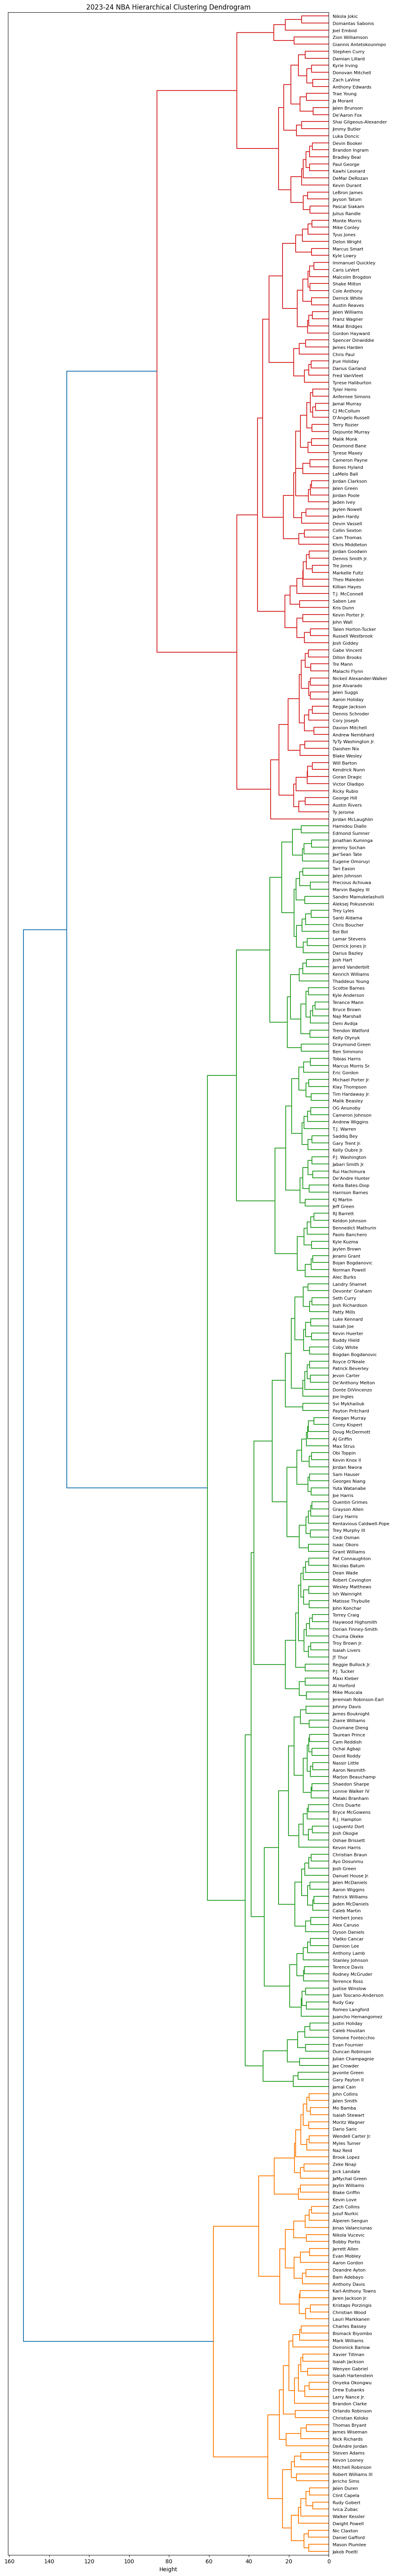

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#testdf = df[(df.MPG > 23) & (df.GP > 15) & (df.SEASON == '2022-23')].reset_index(drop=True)
testdf = df[(df.MPG > 13) & (df.GP > 15) & (df.SEASON == '2022-23')].reset_index(drop=True)

features = [x for x in df.columns if (x != 'PLAYER_NAME') &  (x != 'POSITION') & (x != 'SEASON')]

x = testdf.loc[:, features].values
y = testdf.loc[:,['PLAYER_NAME']].values

x = StandardScaler().fit_transform(x) # standardize all values

pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(x)

plt.figure(figsize=(10,65))
plt.title('2023-24 NBA Hierarchical Clustering Dendrogram')
dend = shc.dendrogram(shc.linkage(x, method='ward'), labels=list(testdf.PLAYER_NAME), orientation='left')

plt.yticks(fontsize=8)
plt.xlabel('Height')

plt.tight_layout()

# Save the plot in PNG format
plt.savefig("nba_hierarchical_clustering_dendrogram.png", format='png', dpi=300)

# Optionally, display the plot as well
plt.show()


In [3]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform


# Convert the PCA feature vectors into a square-form distance matrix
x = principalComponents  # Make sure this is your PCA-transformed feature matrix
y = testdf['PLAYER_NAME'].values  # Player names

# Apply hierarchical clustering to assign cluster labels
# You might need to adjust the 't' value based on your dendrogram to get a meaningful cluster division
cluster_labels = fcluster(shc.linkage(x, method='ward'), t=25, criterion='distance')

# Create a DataFrame mapping players to their cluster labels
player_cluster_mapping = pd.DataFrame({'PLAYER_NAME': y, 'CLUSTER': cluster_labels})

# Prepare a DataFrame to hold each player and their 5 most similar players
similar_players_df = pd.DataFrame()

for player in y:
    # Get the current player's cluster
    cluster = player_cluster_mapping[player_cluster_mapping['PLAYER_NAME'] == player]['CLUSTER'].iloc[0]
    
    # Get indices of players in the same cluster
    indices = player_cluster_mapping[player_cluster_mapping['CLUSTER'] == cluster].index
    
    # Calculate distances from the current player to others in the same cluster
    distances = euclidean_distances(x[indices], [x[player_cluster_mapping.index[player_cluster_mapping['PLAYER_NAME'] == player][0]]]).flatten()
    
    # Get indices of the 5 closest players
    closest_indices = np.argsort(distances)[1:6]  # Exclude the closest (itself)
    
    # Extract names of the 5 closest players
    closest_players = player_cluster_mapping.iloc[indices[closest_indices]]['PLAYER_NAME'].values
    
    # Instead of similar_players_df = similar_players_df.append(...)
    new_row = pd.DataFrame([{'PLAYER_NAME': player,
                         'SIMILAR_1': closest_players[0] if len(closest_players) > 0 else '',
                         'SIMILAR_2': closest_players[1] if len(closest_players) > 1 else '',
                         'SIMILAR_3': closest_players[2] if len(closest_players) > 2 else '',
                         'SIMILAR_4': closest_players[3] if len(closest_players) > 3 else '',
                         'SIMILAR_5': closest_players[4] if len(closest_players) > 4 else ''}])
    similar_players_df = pd.concat([similar_players_df, new_row], ignore_index=True)

# Export the DataFrame to a CSV file
similar_players_df.to_csv('nba_similar_players.csv', index=False)

print("CSV file 'nba_similar_players.csv' has been created with each player and their 5 most similar players.")

CSV file 'nba_similar_players.csv' has been created with each player and their 5 most similar players.
